### Coursera_Capstone

Importing libraries

In [1]:
import pandas as pd, numpy as np,matplotlib.pyplot as plt
import seaborn as sns

Reading dataset

In [2]:
df = pd.read_csv('/Users/andresmussor/Downloads/Data-Collisions.csv')

/Volumes/Transcend/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pd.set_option('display.max_columns', None)
df.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


The data contains 194673 rows and 38 columns

In [4]:
df.shape

(194673, 38)

Text(0.5, 1.0, 'Histogram of Severity Code type')

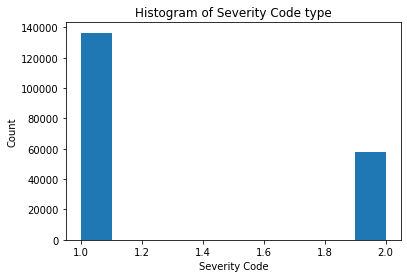

In [5]:
plt.hist(df["SEVERITYCODE"])

plt.xlabel("Severity Code")
plt.ylabel("Count")
plt.title("Histogram of Severity Code type")

In [6]:
df['INCDATE'] = pd.to_datetime(df['INCDATE'])
df['day_week'] = df['INCDATE'].dt.dayofweek

In [7]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['HOUR'] = df['INCDTTM'].dt.hour

We can see that the behaviour in day of weeks is similar to the weekend

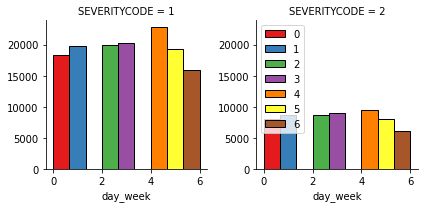

In [8]:
bins = np.linspace(df['day_week'].min(), df['day_week'].max(), 10)
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="day_week", palette="Set1", col_wrap=2)
g.map(plt.hist, 'day_week', bins = bins, ec="k")
g.axes[-1].legend()
plt.show()

We can see that accidents appears frequently by 00 o clock

Text(0.5, 1.0, 'Histogram of accidents by hour')

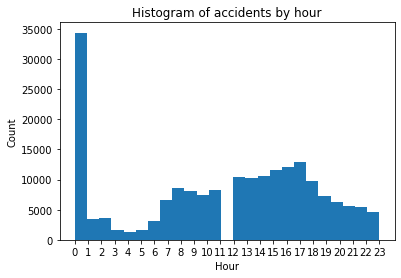

In [9]:
plt.hist(df['HOUR'].sort_values().astype(str),bins=25)
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Histogram of accidents by hour")

### Data Wrangling

#### Missing data

In [10]:
df_null = df.isnull()
for column in df_null.columns.to_list():
    print(df_null[column].value_counts(),'\n')

False    194673
Name: SEVERITYCODE, dtype: int64 

False    189339
True       5334
Name: X, dtype: int64 

False    189339
True       5334
Name: Y, dtype: int64 

False    194673
Name: OBJECTID, dtype: int64 

False    194673
Name: INCKEY, dtype: int64 

False    194673
Name: COLDETKEY, dtype: int64 

False    194673
Name: REPORTNO, dtype: int64 

False    194673
Name: STATUS, dtype: int64 

False    192747
True       1926
Name: ADDRTYPE, dtype: int64 

True     129603
False     65070
Name: INTKEY, dtype: int64 

False    191996
True       2677
Name: LOCATION, dtype: int64 

True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64 

True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64 

False    194673
Name: SEVERITYCODE.1, dtype: int64 

False    194673
Name: SEVERITYDESC, dtype: int64 

False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64 

False    194673
Name: PERSONCOUNT, dtype: int64 

False    194673
Name: PEDCOUNT, dtype: int64 

False    1946

Selecting the important variables and eliminate NaN values (we can replace with the mean, but i detect
that the shape doesn't change too much

In [16]:
df_filt = df[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND','UNDERINFL','COLLISIONTYPE']].dropna(axis=0)
df_filt.shape

(189316, 6)

In [17]:
df_filt['UNDERINFL'].replace(to_replace=['N','Y'], value=['0','1'],inplace=True)

#### Balancing data

In [18]:
df_filt = pd.concat([df_filt[df_filt['SEVERITYCODE']==1].sample(50000, replace = True), df_filt[df_filt['SEVERITYCODE']==2].sample(50000)], axis=0)
df_filt.shape

(100000, 6)

In [19]:
df_filt.head(5)

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL,COLLISIONTYPE
67018,1,Clear,Dry,Dark - Street Lights On,1,Other
157355,1,Clear,Dry,Daylight,0,Rear Ended
32038,1,Raining,Wet,Dark - Street Lights On,0,Angles
24601,1,Unknown,Unknown,Unknown,0,Parked Car
127750,1,Raining,Wet,Daylight,0,Rear Ended


#### Transforming categorical variables into numerical

In [20]:
from sklearn.preprocessing import LabelEncoder

Feature = df_filt[['WEATHER', 'ROADCOND', 'LIGHTCOND', 'UNDERINFL','COLLISIONTYPE']]

for f in ['WEATHER', 'ROADCOND', 'LIGHTCOND','UNDERINFL','COLLISIONTYPE']:
    Feature[f] = Feature[f].astype('|S') 
    Feature[f] = LabelEncoder().fit_transform(Feature[f])

Feature.head()

/Volumes/Transcend/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Volumes/Transcend/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL,COLLISIONTYPE
67018,1,0,2,1,4
157355,1,0,5,0,7
32038,6,8,2,0,0
24601,10,7,8,0,5
127750,6,8,5,0,7


In [ ]:
#Feature = df_filt[['UNDERINFL']]
#Feature = pd.concat([Feature,pd.get_dummies(df_filt['WEATHER'])], axis=1)
#Feature = pd.concat([Feature,pd.get_dummies(df_filt['ROADCOND'])], axis=1)
#Feature = pd.concat([Feature,pd.get_dummies(df_filt['LIGHTCOND'])], axis=1)
#Feature = pd.concat([Feature,pd.get_dummies(df_filt['COLLISIONTYPE'])], axis=1)

In [21]:
X = Feature
y = df_filt['SEVERITYCODE']

#### Data Normalization

In [22]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)

### Model Development

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics

In [25]:
LR = LogisticRegression(C=0.0001, solver='liblinear')
LR.fit(X_train, y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [26]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat_knn = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_knn)

    
    std_acc[n-1] = np.std(yhat_knn==y_test)/np.sqrt(yhat_knn.shape[0])

mean_acc

array([0.6223    , 0.56666667, 0.6176    , 0.6118    , 0.65183333,
       0.6085    , 0.6132    , 0.6324    , 0.64393333])

For KNN model, we find the best k for this model

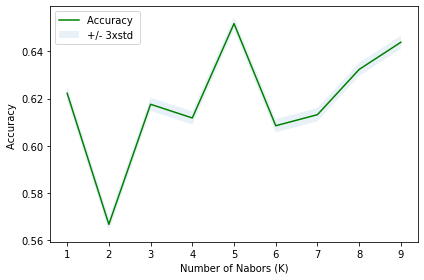

The best accuracy was with jaccard index of: 0.6518333333333334 with k= 5


In [29]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with jaccard index of:", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [30]:
neigh = KNeighborsClassifier(n_neighbors = 5).fit(X_train,y_train)

### Model Evaluation

In [31]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [32]:
yhat_knn = neigh.predict(X_test)
yhat_Tree = Tree.predict(X_test)
yhat_SVM = clf.predict(X_test)
yhat_LR = LR.predict(X_test)
yhat_LR_prob = LR.predict_proba(X_test)

In [33]:
yhat = [yhat_knn, yhat_Tree, yhat_SVM, yhat_LR]
jaccard_index = []
f1_index = []
loss_index = ['NA','NA','NA',log_loss(y_test, yhat_LR_prob)]

for model in yhat:
        jaccard_index.append(jaccard_similarity_score(y_test, model))
        f1_index.append(f1_score(y_test, model, average='weighted'))

In [34]:
#Final Report
parameters = pd.DataFrame({'Algorithm': ['KNN','Decision Tree','SVM','LogisticRegression'], 'Jaccard': jaccard_index, 'F1-score': f1_index, 'LogLoss': loss_index})
parameters

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.651833,0.646871,NA
1,Decision Tree,0.702300,0.700003,NA
2,SVM,0.660133,0.659357,NA
3,LogisticRegression,0.534600,0.534478,0.676776
